## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [3]:
df = pd.read_csv('used_car_price.csv')

In [4]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [5]:
df.shape

(10000, 12)

In [6]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [7]:
(2038/10000)*100

20.380000000000003

In [8]:
df['service_history'].fillna("None", inplace = True)

In [9]:
df['service_history'].value_counts()

service_history
Full       4987
Partial    2975
None       2038
Name: count, dtype: int64

There are null value in service_history column.

So, filling them with None.

In [10]:
#Feature Engineering
df['make_year'] = 2025 - df['make_year']
df.rename(columns={'make_year': 'car_age'}, inplace=True)

In [11]:
df.dtypes

car_age                 int64
mileage_kmpl          float64
engine_cc               int64
fuel_type              object
owner_count             int64
price_usd             float64
brand                  object
transmission           object
color                  object
service_history        object
accidents_reported      int64
insurance_valid        object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_age             10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [13]:
object_data = df.select_dtypes(include=['object'])

In [14]:
for name in object_data.columns:
    print(f"The unique values in {name} are :\n {df[name].unique()} \n")


The unique values in fuel_type are :
 ['Petrol' 'Diesel' 'Electric'] 

The unique values in brand are :
 ['Chevrolet' 'Honda' 'BMW' 'Hyundai' 'Nissan' 'Tesla' 'Toyota' 'Kia'
 'Volkswagen' 'Ford'] 

The unique values in transmission are :
 ['Manual' 'Automatic'] 

The unique values in color are :
 ['White' 'Black' 'Blue' 'Red' 'Gray' 'Silver'] 

The unique values in service_history are :
 ['None' 'Full' 'Partial'] 

The unique values in insurance_valid are :
 ['No' 'Yes'] 



In [15]:
df.describe(include='all')

,car_age,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
count,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000,10000,10000,10000,10000.000000,10000
unique,NaN,NaN,NaN,3,NaN,NaN,10,2,6,3,NaN,2
top,NaN,NaN,NaN,Petrol,NaN,NaN,Nissan,Manual,Gray,Full,NaN,Yes
freq,NaN,NaN,NaN,4968,NaN,NaN,1089,5985,1705,4987,NaN,7934
mean,15.793100,17.960753,2287.130000,NaN,3.003500,7179.754532,NaN,NaN,NaN,NaN,0.492200,NaN
std,8.373858,5.025486,1291.276927,NaN,1.418904,2795.270940,NaN,NaN,NaN,NaN,0.694109,NaN
min,2.000000,5.000000,800.000000,NaN,1.000000,1000.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,9.000000,14.540000,1200.000000,NaN,2.000000,5176.547500,NaN,NaN,NaN,NaN,0.000000,NaN
50%,16.000000,17.970000,1800.000000,NaN,3.000000,6961.260000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,23.000000,21.352500,3000.000000,NaN,4.000000,8993.732500,NaN,NaN,NaN,NaN,1.000000,NaN


In [16]:
len(df['brand'].unique())

10

object = ['fuel_type','brand', 'transmission', 'color', 'service_history', 'insurance_valid']

<h3> Encoding the data.

The unique values in fuel_type are :
 ['Petrol' 'Diesel' 'Electric'] 

The unique values in brand are :
 ['Chevrolet' 'Honda' 'BMW' 'Hyundai' 'Nissan' 'Tesla' 'Toyota' 'Kia'
 'Volkswagen' 'Ford'] 

The unique values in transmission are :
 ['Manual' 'Automatic'] 

The unique values in color are :
 ['White' 'Black' 'Blue' 'Red' 'Gray' 'Silver'] 

The unique values in service_history are :
 [nan 'Full' 'Partial'] 

The unique values in insurance_valid are :
 ['No' 'Yes']

In [17]:
for name in object_data.columns:
    print(f"The unique values in {name} are :\n {df[name].value_counts()} \n")

The unique values in fuel_type are :
 fuel_type
Petrol      4968
Diesel      4058
Electric     974
Name: count, dtype: int64 

The unique values in brand are :
 brand
Nissan        1089
Volkswagen    1033
BMW           1021
Tesla         1006
Honda         1003
Chevrolet      999
Hyundai        989
Toyota         956
Kia            955
Ford           949
Name: count, dtype: int64 

The unique values in transmission are :
 transmission
Manual       5985
Automatic    4015
Name: count, dtype: int64 

The unique values in color are :
 color
Gray      1705
Black     1702
Red       1678
White     1651
Blue      1634
Silver    1630
Name: count, dtype: int64 

The unique values in service_history are :
 service_history
Full       4987
Partial    2975
None       2038
Name: count, dtype: int64 

The unique values in insurance_valid are :
 insurance_valid
Yes    7934
No     2066
Name: count, dtype: int64 



In [18]:
df_encoded = df.copy()
df_cat = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

for name in object_data.columns:
    le = LabelEncoder()
    le.fit(df[name])
    le.classes_
    df_encoded[name] = le.transform(df[name])

<h3>So label is done in the Alphabetical order.

<h3> Data Vizualization.

In [20]:
def plot_features(dataset):
   #(boxplot, histogram+kde, violin, kde plot)
    fig, axes = plt.subplots(nrows=len(dataset.columns), ncols=4, figsize=(20, len(dataset.columns) * 3))
    
    for i, feature in enumerate(dataset.columns):
        # Boxplot
        sns.boxplot(data=dataset, x=feature, ax=axes[i,0], color='#4a90e2')
        axes[i,0].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='semibold')
        axes[i,0].set_xlabel('')
        axes[i,0].set_ylabel('')

        # Histogram with KDE
        sns.histplot(data=dataset, x=feature, ax=axes[i,1], kde=True, color='#7b68ee')
        axes[i,1].set_title(f'Histogram & KDE', fontsize=14, fontweight='semibold')
        axes[i,1].set_xlabel('')
        axes[i,1].set_ylabel('')

        # Violin plot
        sns.violinplot(data=dataset, x=feature, ax=axes[i,2], color='#50c878')
        axes[i,2].set_title(f'Violin plot', fontsize=14, fontweight='semibold')
        axes[i,2].set_xlabel('')
        axes[i,2].set_ylabel('')

        # KDE plot only
        sns.kdeplot(data=dataset, x=feature, ax=axes[i,3], fill=True, color='#e07a5f')
        axes[i,3].set_title(f'KDE plot', fontsize=14, fontweight='semibold')
        axes[i,3].set_xlabel('')
        axes[i,3].set_ylabel('')

    plt.tight_layout(pad=4.0)
    plt.show()

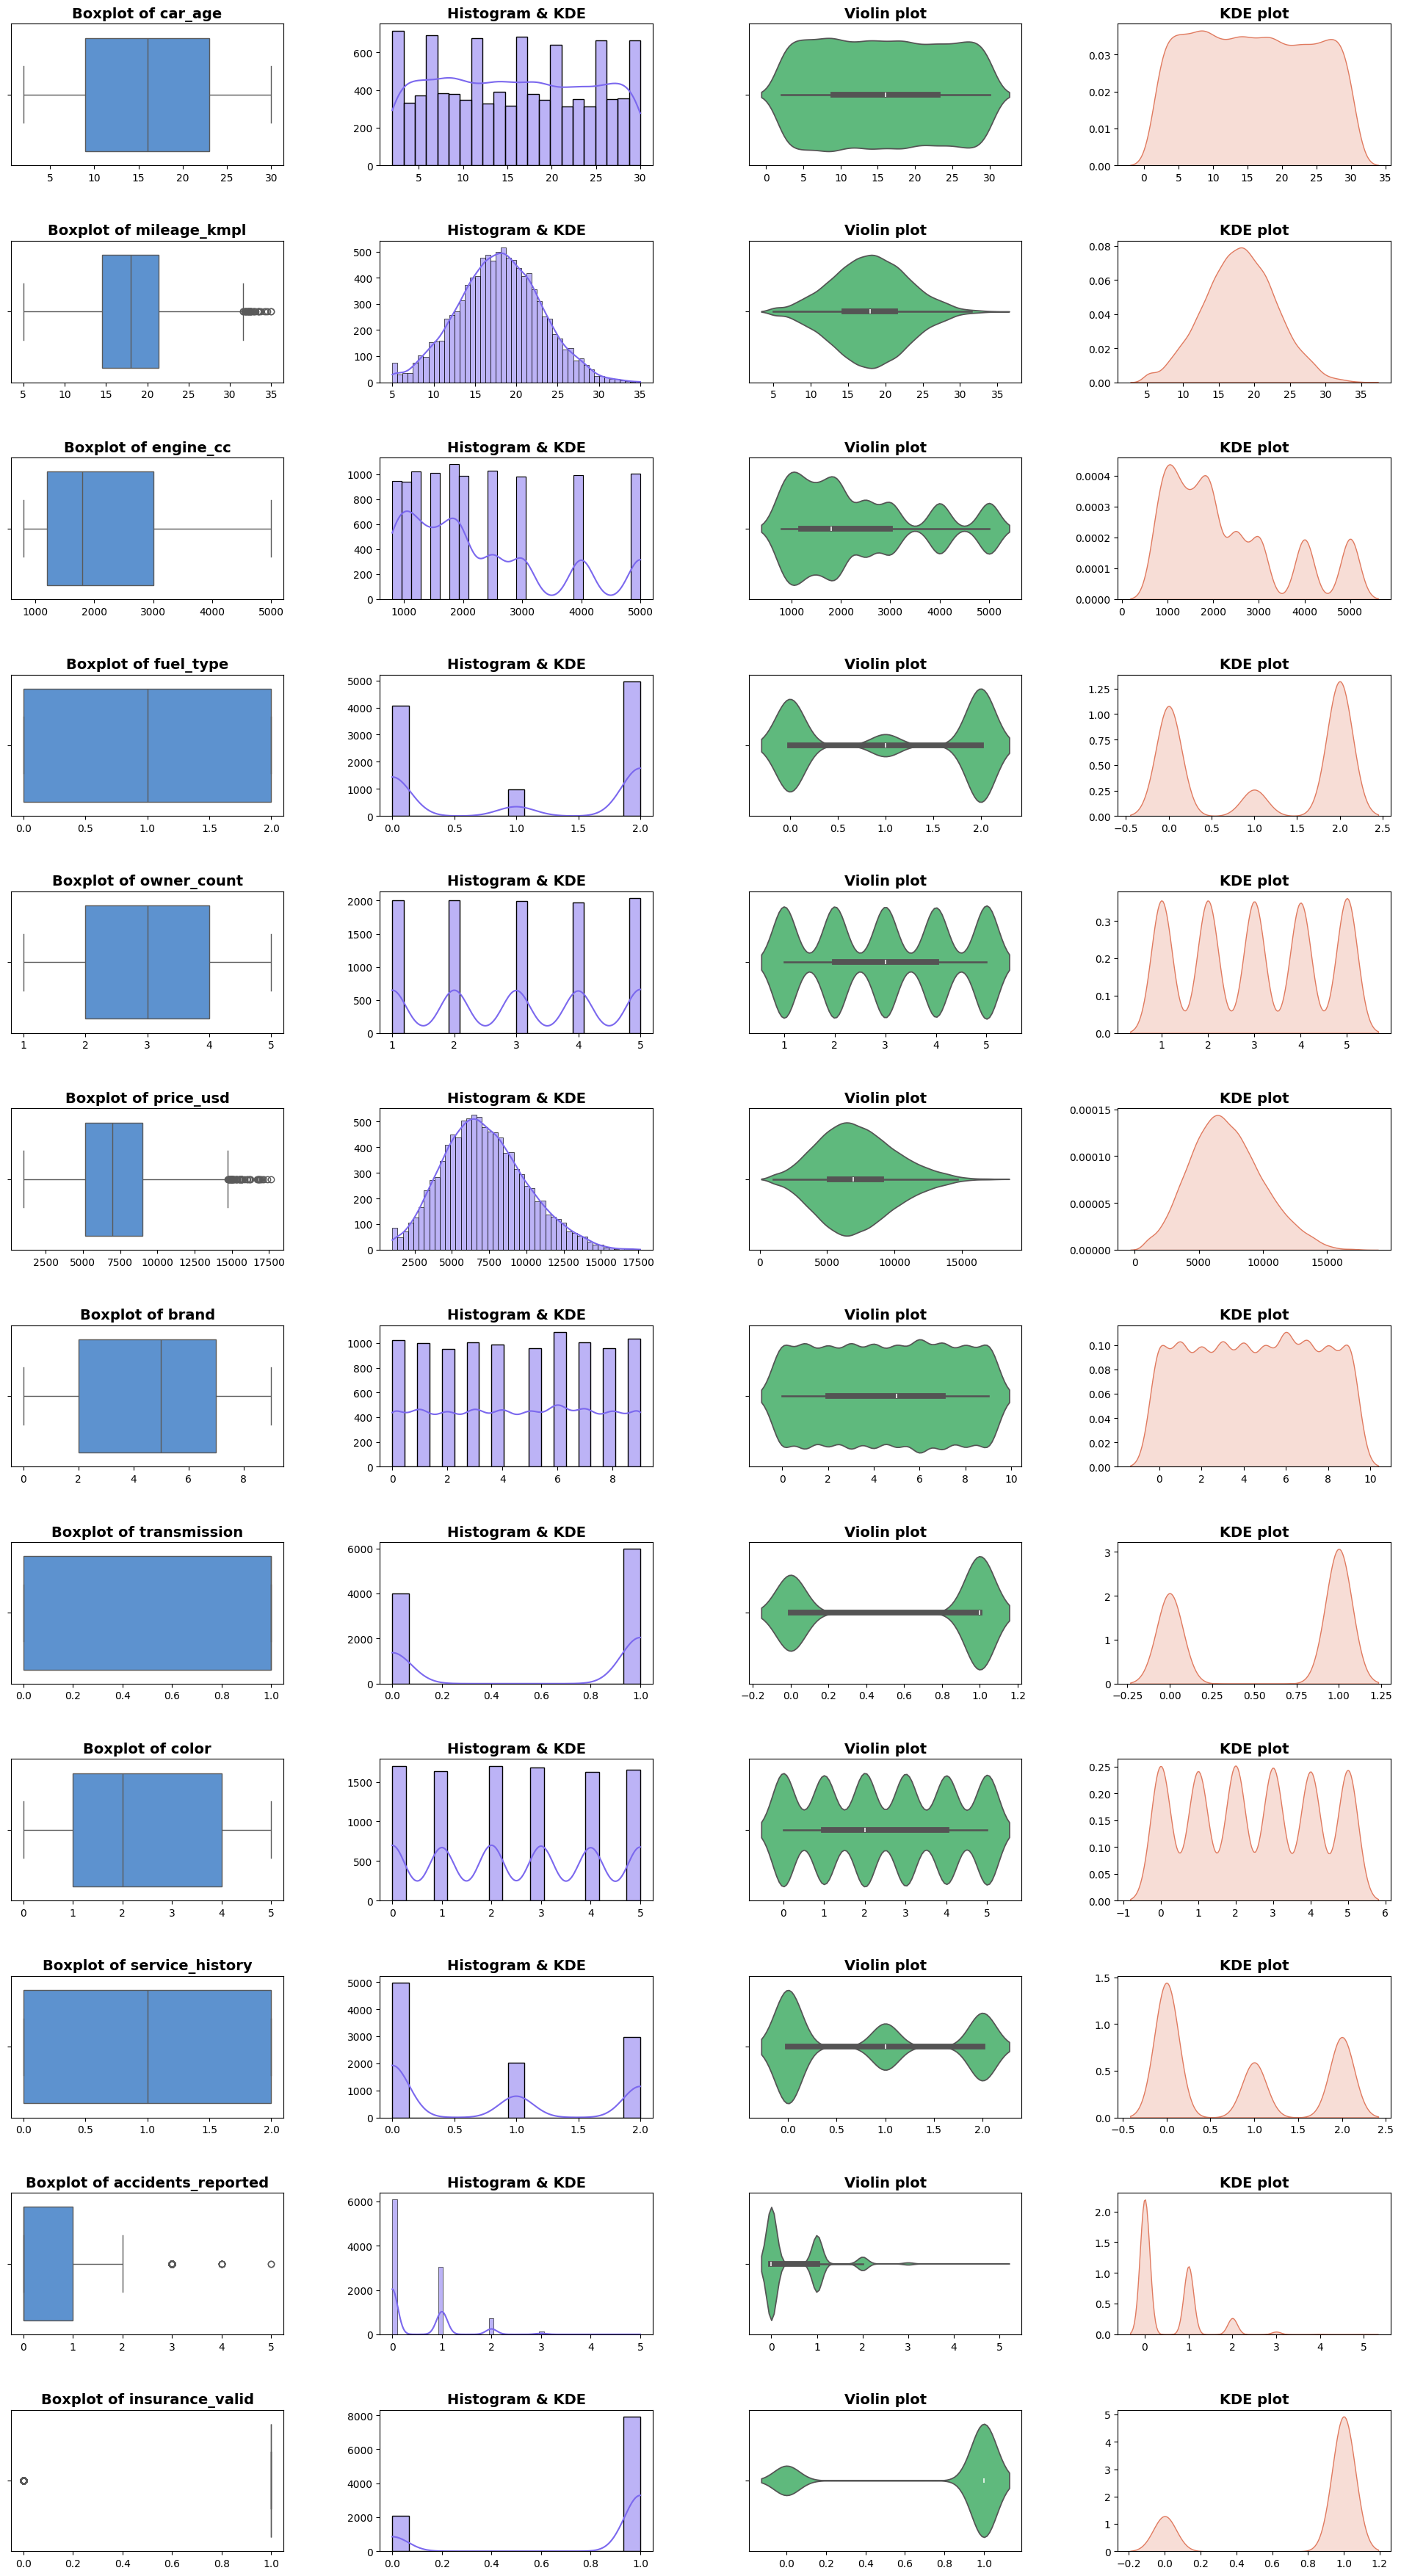

In [21]:
plot_features(df_encoded)

In [22]:
def outlier_finder(data_sample):
    for feature in data_sample.columns:
        q1 = data_sample[feature].quantile(0.25)
        q3 = data_sample[feature].quantile(0.75)
        iqr = q3 - q1
        min_val = q1 - (1.5 * iqr)
        max_val = q3 + (1.5 * iqr)
        
        # Find outliers
        outliers = data_sample[(data_sample[feature] < min_val) | (data_sample[feature] > max_val)]
        
        print(f"Number of Outliers in {feature}: {len(outliers)}")
outlier_finder(df_encoded)

Number of Outliers in car_age: 0
Number of Outliers in mileage_kmpl: 36
Number of Outliers in engine_cc: 0
Number of Outliers in fuel_type: 0
Number of Outliers in owner_count: 0
Number of Outliers in price_usd: 58
Number of Outliers in brand: 0
Number of Outliers in transmission: 0
Number of Outliers in color: 0
Number of Outliers in service_history: 0
Number of Outliers in accidents_reported: 130
Number of Outliers in insurance_valid: 2066


<h3> I am not going to remove outliers for this dataset.

<Axes: >

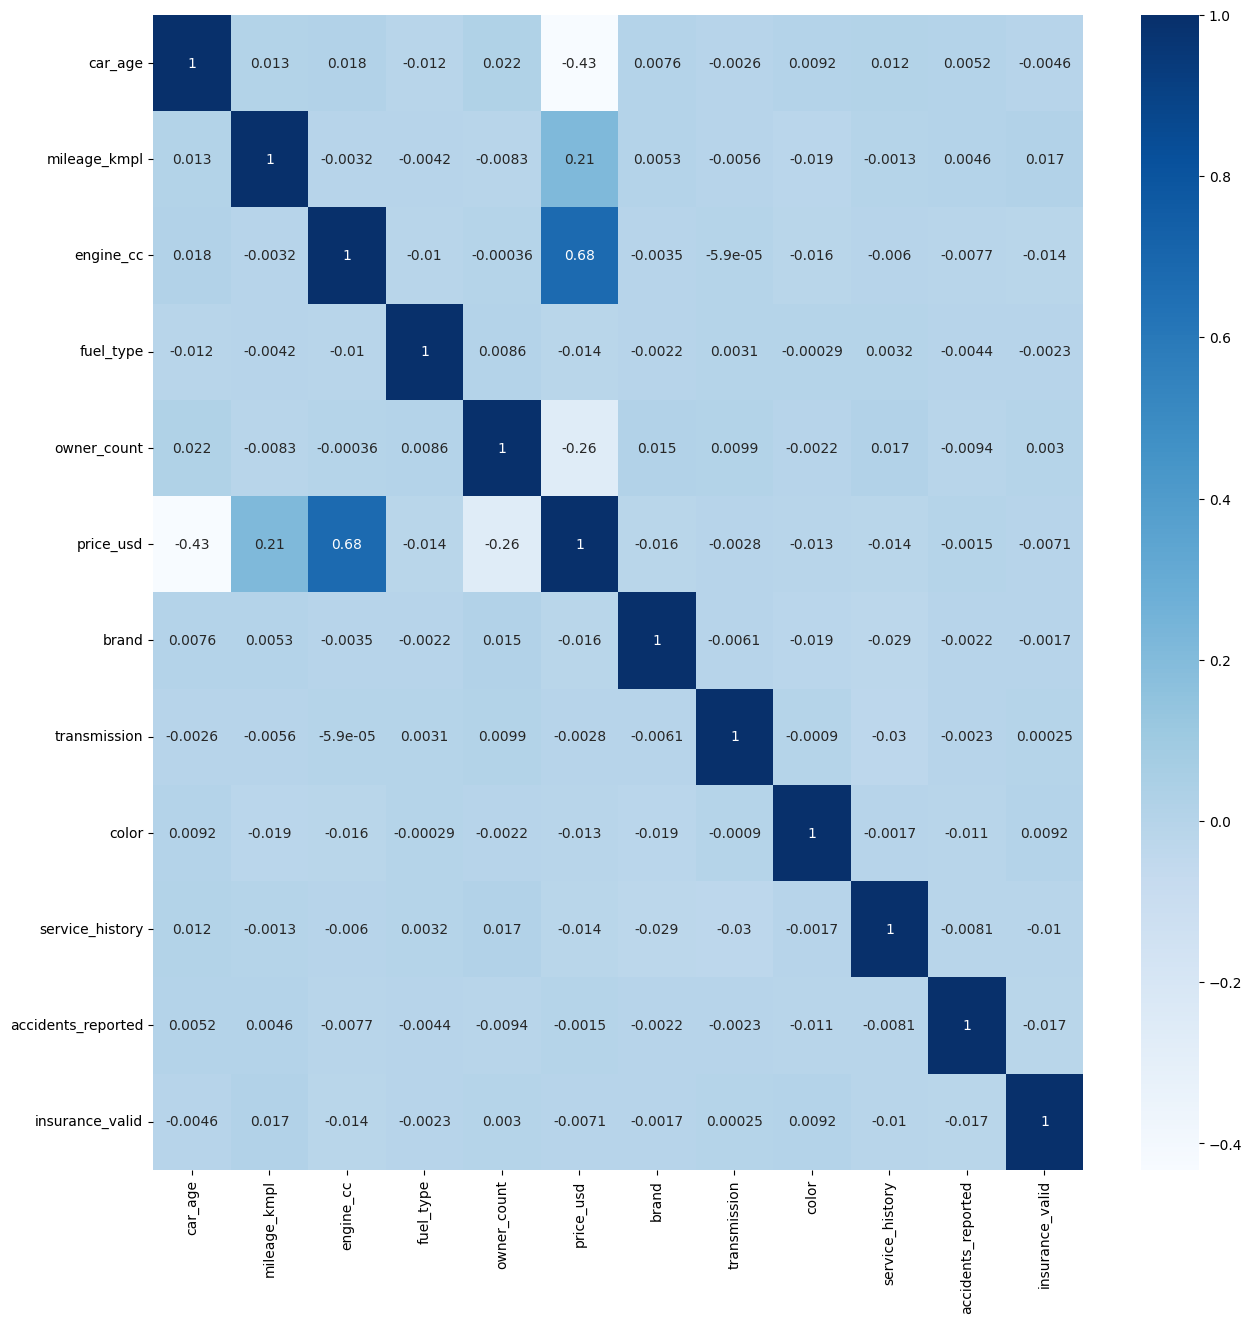

In [23]:
cmap = sns.diverging_palette(10,10, as_cmap=True)
corr= df_encoded.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap='Blues',annot=True)

In [24]:
X = df_encoded.drop(columns=['price_usd'],axis = 1)
Y = df_encoded['price_usd']

### Model Selection.

In [25]:
# Data splitiing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=21,test_size=0.2)

In [27]:
print(f"{x_train.shape},{y_train.shape},{x_test.shape},{y_test.shape}")

(8000, 11),(8000,),(2000, 11),(2000,)


In [28]:
# Building pipelins.

from sklearn.linear_model import LogisticRegression


dt=DecisionTreeRegressor()

rf=RandomForestRegressor()

knn=KNeighborsRegressor()

xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)

lr = LinearRegression()

# List of the models
models = [dt, rf, knn,xgb,lr]

# Pipeliline model names
model_dict = {0: "DecisionTree", 1: "RandomForest",2: "KNeighbors", 3: "XGBoost", 4: "Linear Regression"}


<h4> Model training.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = []
mse = []
mae = []
r2 = []

for i, model in enumerate(models):
    model.fit(x_train, y_train)

    # Predict on test sets
    y_pred = model.predict(x_test)

    # Compute metrics
    rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
    mse_ = mean_squared_error(y_test, y_pred)
    mae_ = mean_absolute_error(y_test, y_pred)
    r2_ = r2_score(y_test, y_pred)

    rmse.append(rmse_)
    mse.append(mse_)
    mae.append(mae_)
    r2.append(r2_)

    print(f"{model_dict[i]}:")
    print(f"MSE: {mse[i]:.4f}")
    print(f"RMSE: {rmse[i]:.4f}")
    print(f"MAE: {mae[i]:.4f}")
    print(f"R2-Score: {r2[i]:.4f} \n")


DecisionTree:
MSE: 3466473.9421
RMSE: 1861.8469
MAE: 1438.3264
R2-Score: 0.5637 

RandomForest:
MSE: 1546610.1252
RMSE: 1243.6278
MAE: 972.2469
R2-Score: 0.8053 

KNeighbors:
MSE: 2293544.7756
RMSE: 1514.4454
MAE: 1168.6796
R2-Score: 0.7113 

XGBoost:
MSE: 1282212.4744
RMSE: 1132.3482
MAE: 904.1942
R2-Score: 0.8386 

Linear Regression:
MSE: 1766382.6990
RMSE: 1329.0533
MAE: 1003.6013
R2-Score: 0.7777 



<h3>CatBoost Model

In [30]:
X_cat = df_cat.drop(columns=['price_usd'],axis = 1)
Y_cat = df_cat['price_usd']

x_train_cat,x_test_cat,y_train_cat,y_test_cat = train_test_split(X_cat,Y_cat,random_state=21,test_size=0.2)

In [31]:
cat_features = x_train_cat.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

Categorical features: ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']


In [32]:
from catboost import CatBoostRegressor

# Initialize CatBoost Regressor
model_cat = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.01,
    depth=8,
    loss_function='RMSE',         # For regression, using RMSE
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

# Fit model
model_cat.fit(
    x_train_cat, y_train_cat,
    cat_features=cat_features,
    eval_set=(x_test_cat, y_test_cat),
    use_best_model=True,
    # plot=True
)

# Predict
y_pred_cat = model_cat.predict(x_test_cat)

# Evaluate
best_scores = model_cat.get_best_score()
rmse_cat = np.sqrt(mean_squared_error(y_test_cat, y_pred_cat))
mse_cat = mean_squared_error(y_test_cat, y_pred_cat)
mae_cat = mean_absolute_error(y_test_cat, y_pred_cat)
r2_cat= r2_score(y_test_cat, y_pred_cat)

0:	learn: 2769.1003021	test: 2799.7497494	best: 2799.7497494 (0)	total: 192ms	remaining: 6m 22s
100:	learn: 1550.0893613	test: 1558.0904750	best: 1558.0904750 (100)	total: 4.4s	remaining: 1m 22s
200:	learn: 1154.1083480	test: 1162.7541130	best: 1162.7541130 (200)	total: 9.04s	remaining: 1m 20s
300:	learn: 1036.3422610	test: 1051.2223674	best: 1051.2223674 (300)	total: 17.2s	remaining: 1m 37s
400:	learn: 998.0004827	test: 1019.8158517	best: 1019.8158517 (400)	total: 26.4s	remaining: 1m 45s
500:	learn: 981.1420532	test: 1009.7340532	best: 1009.7340532 (500)	total: 36.7s	remaining: 1m 49s
600:	learn: 972.4866613	test: 1006.1795160	best: 1006.1795160 (600)	total: 46s	remaining: 1m 47s
700:	learn: 965.8212979	test: 1004.5090138	best: 1004.5055264 (699)	total: 55.3s	remaining: 1m 42s
800:	learn: 959.9520761	test: 1003.6476972	best: 1003.6476972 (800)	total: 1m 4s	remaining: 1m 35s
900:	learn: 953.9919407	test: 1003.1726035	best: 1003.1652747 (898)	total: 1m 14s	remaining: 1m 30s
1000:	learn:

In [33]:
rmse.append(rmse_cat)
mse.append(mse_cat)
mae.append(mae_cat)
r2.append(r2_cat)

<h3>Model Evaluation

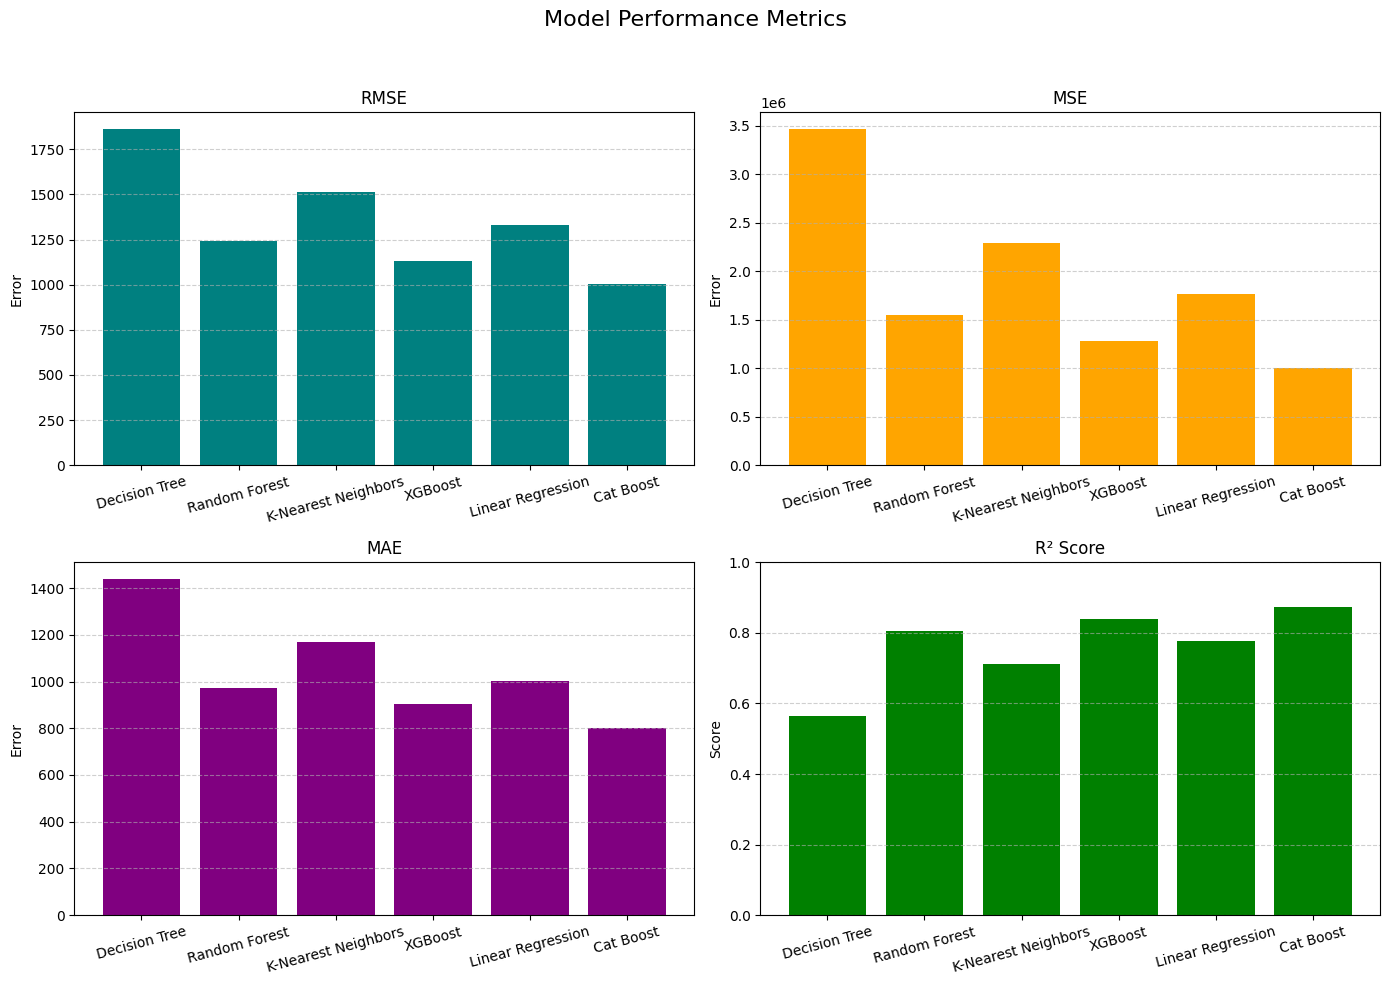

In [34]:
model_names = ["Decision Tree", "Random Forest", "K-Nearest Neighbors", "XGBoost", "Linear Regression","Cat Boost"]

x = np.arange(len(model_names))

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Metrics', fontsize=16)

# RMSE
axs[0, 0].bar(x, rmse, color='teal')
axs[0, 0].set_title('RMSE')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(model_names, rotation=15)
axs[0, 0].set_ylabel('Error')

# MSE
axs[0, 1].bar(x, mse, color='orange')
axs[0, 1].set_title('MSE')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(model_names, rotation=15)
axs[0, 1].set_ylabel('Error')

# MAE
axs[1, 0].bar(x, mae, color='purple')
axs[1, 0].set_title('MAE')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(model_names, rotation=15)
axs[1, 0].set_ylabel('Error')

# R² Score
axs[1, 1].bar(x, r2, color='green')
axs[1, 1].set_title('R² Score')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(model_names, rotation=15)
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_ylabel('Score')

# Add grid and layout adjustments
for ax in axs.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title
plt.show()


| Metric   | What it Measures        | Goal                      | Interpretation                            |
| -------- | ----------------------- | ------------------------- | ----------------------------------------- |
| **MSE**  | Avg. squared error      | Lower = better            | Sensitive to large errors                 |
| **RMSE** | Square root of MSE      | Lower = better            | Same units as target, easier to interpret |
| **MAE**  | Avg. absolute error     | Lower = better            | More robust to outliers                   |
| **R²**   | % of variance explained | Higher = better (max = 1) | Measures goodness of fit                  |

<h3> Cat Boost is best here.

## Hypertuning

<h4>1. CatBoost Model<br/> 2. XgBoost Model

In [36]:
from scipy.stats import randint, uniform

# ---------- XGBoost Regressor ----------
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb_search = RandomizedSearchCV(
    xgb, 
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(x_train, y_train)
print("Best XGBoost params:", xgb_search.best_params_)

y_pred_xgb = xgb_search.predict(x_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost Test RMSE: {rmse_xgb:.4f}")

# ---------- CatBoost Regressor ----------
cat = CatBoostRegressor(random_seed=42, verbose=0)


cat_param_dist = {
    'iterations': randint(800, 1500),                 
    'depth': randint(4, 10),                          
    'learning_rate': uniform(0.01, 0.09),             
    'l2_leaf_reg': uniform(1, 5),                     
    'bagging_temperature': uniform(0.1, 0.7),         
    'random_strength': uniform(0.1, 1)                
}

cat_search = RandomizedSearchCV(
    cat,
    param_distributions=cat_param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

cat_search.fit(x_train, y_train)
print("Best CatBoost params:", cat_search.best_params_)

y_pred_cat = cat_search.predict(x_test)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
print(f"CatBoost Test RMSE: {rmse_cat:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost params: {'colsample_bytree': np.float64(0.6142750108986499), 'learning_rate': np.float64(0.06248647812878086), 'max_depth': 3, 'n_estimators': 293, 'reg_alpha': np.float64(0.5296505783560065), 'reg_lambda': np.float64(0.24185229090045168), 'subsample': np.float64(0.5465513839029497)}
XGBoost Test RMSE: 1007.7311
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CatBoost params: {'bagging_temperature': np.float64(0.5107258159646937), 'depth': 4, 'iterations': 987, 'l2_leaf_reg': np.float64(3.7134804157912424), 'learning_rate': np.float64(0.02268318024772864), 'random_strength': np.float64(0.9021969807540396)}
CatBoost Test RMSE: 999.8630


XgBoost

In [37]:
model_xgb = xgb_search.best_estimator_
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.6142750108986499), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None,
             learning_rate=np.float64(0.06248647812878086), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=293, n_jobs=None,
             num_parallel_tree=None, ...)

In [38]:
xgb_pred = model_xgb.predict(x_test)

rmse.append(np.sqrt(mean_squared_error(y_test, xgb_pred)))
mse.append(mean_squared_error(y_test, xgb_pred))
mae.append(mean_absolute_error(y_test, xgb_pred))
r2.append(r2_score(y_test, xgb_pred))

Cat Boost

In [39]:
model_cat_tune = cat_search.best_estimator_
model_cat_tune.fit(
    x_train_cat, y_train_cat,
    cat_features=cat_features,
    eval_set=(x_test_cat, y_test_cat),
    use_best_model=True,
    # plot=True
)

In [40]:
cat_pred = model_cat_tune.predict(x_test_cat)

rmse.append(np.sqrt(mean_squared_error(y_test_cat, cat_pred)))
mse.append(mean_squared_error(y_test_cat, cat_pred))
mae.append(mean_absolute_error(y_test_cat, cat_pred))
r2.append(r2_score(y_test_cat, cat_pred))

<h3>Model Evaluation after Hypertuning the models.

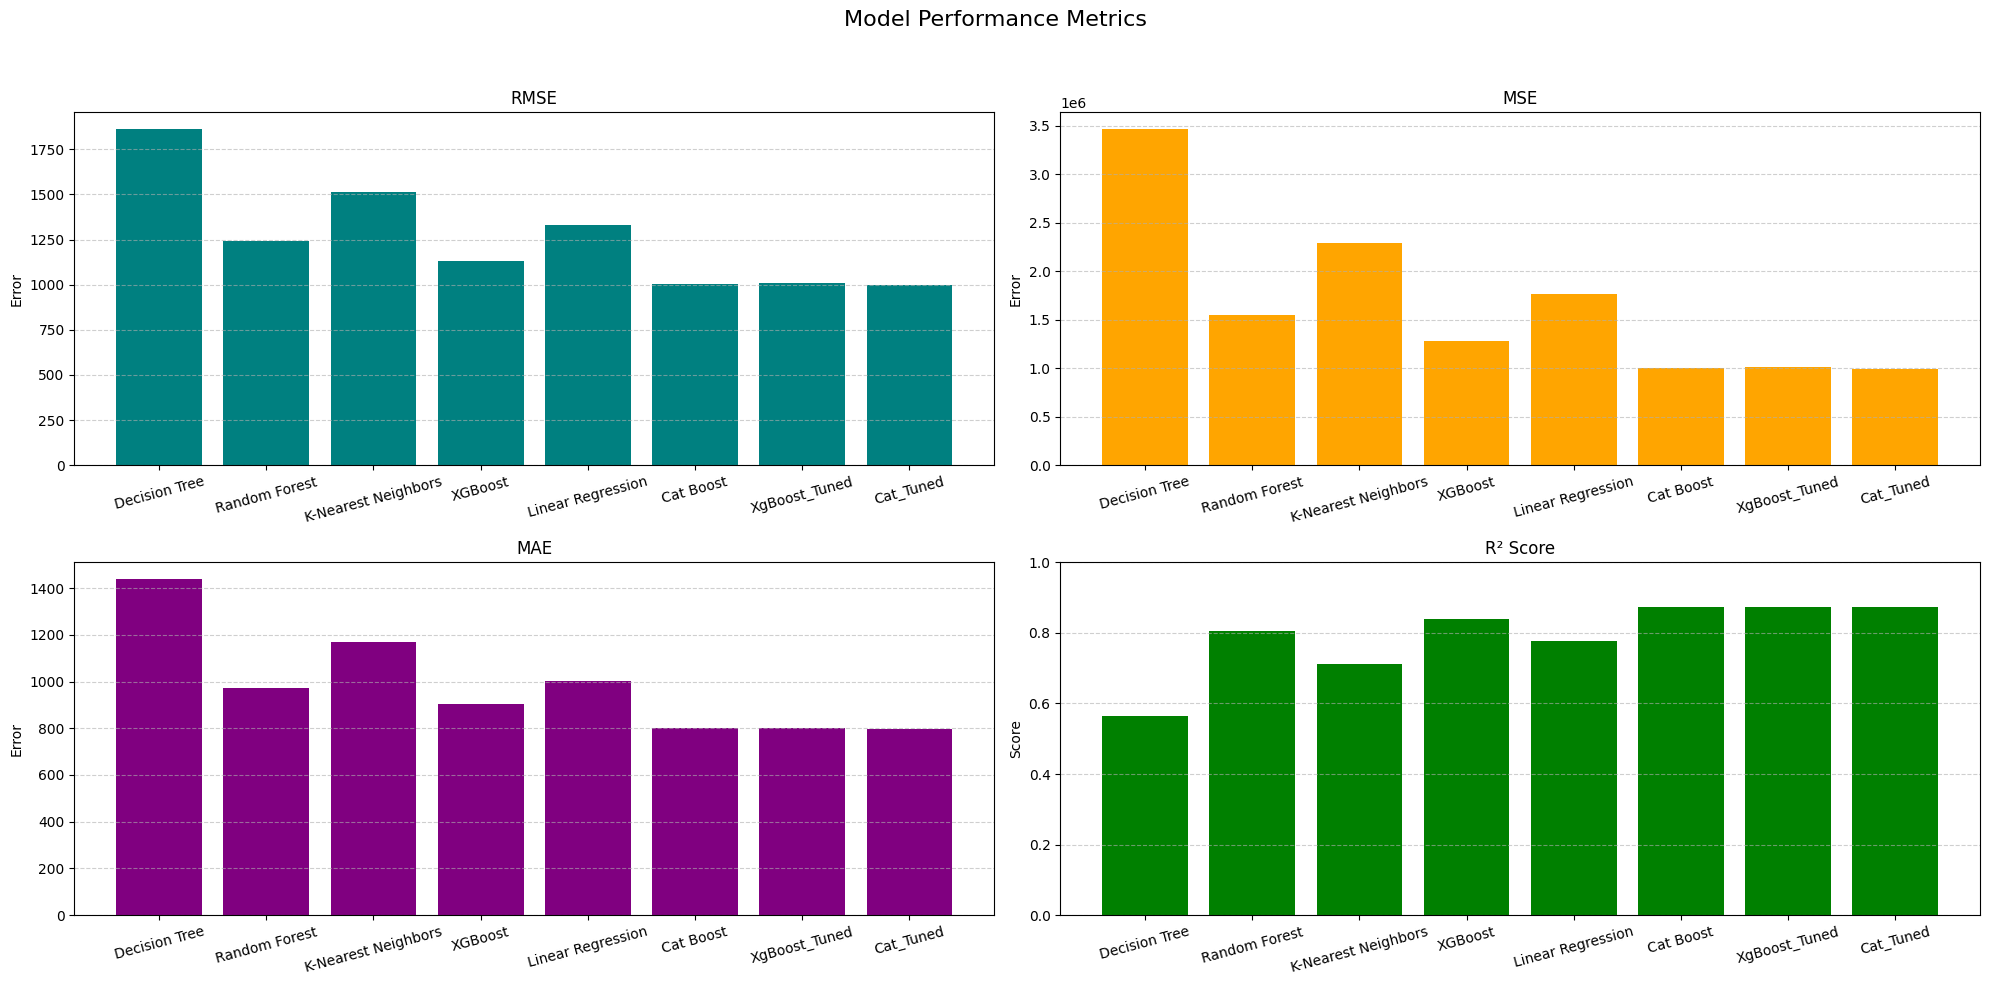

In [41]:
model_names = ["Decision Tree", "Random Forest", "K-Nearest Neighbors", "XGBoost", "Linear Regression","Cat Boost",
               "XgBoost_Tuned","Cat_Tuned"]

x = np.arange(len(model_names))

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Model Performance Metrics', fontsize=16)

# RMSE
axs[0, 0].bar(x, rmse, color='teal')
axs[0, 0].set_title('RMSE')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(model_names, rotation=15)
axs[0, 0].set_ylabel('Error')

# MSE
axs[0, 1].bar(x, mse, color='orange')
axs[0, 1].set_title('MSE')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(model_names, rotation=15)
axs[0, 1].set_ylabel('Error')

# MAE
axs[1, 0].bar(x, mae, color='purple')
axs[1, 0].set_title('MAE')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(model_names, rotation=15)
axs[1, 0].set_ylabel('Error')

# R² Score
axs[1, 1].bar(x, r2, color='green')
axs[1, 1].set_title('R² Score')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(model_names, rotation=15)
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_ylabel('Score')

# Add grid and layout adjustments
for ax in axs.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title
plt.show()


In [48]:
r2

[0.5636749989007159,
 0.8053282165501616,
 0.7113115680504243,
 0.8386079432241005,
 0.7776654473879295,
 0.8733782782522599,
 0.8721762666934352,
 0.8745513718580712]

<h3> Hypertuned catboost model is best here.

In [42]:
def feature_importance(model):
    importances = model.feature_importances_
    feat_imp_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
    feat_imp_df.sort_values('Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 5))
    # plt.title(f"{model} Feature Importances")
    plt.title(f"Feature Importances")
    plt.tight_layout()
    plt.show()

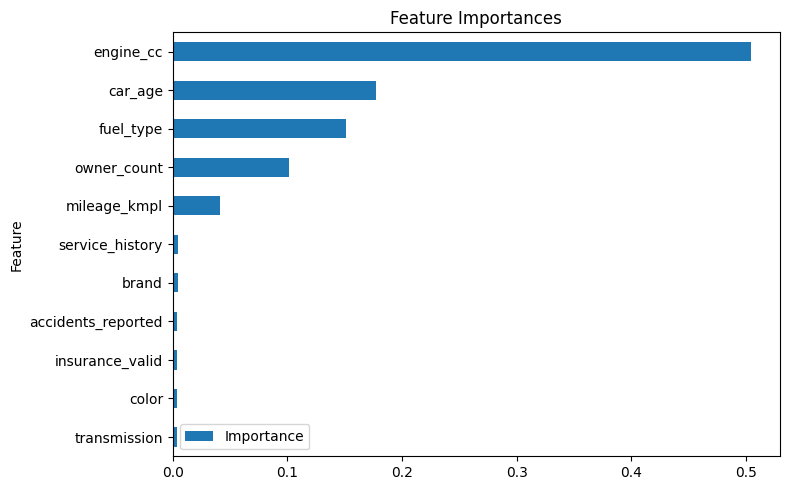

In [49]:
feature_importance(model_xgb)

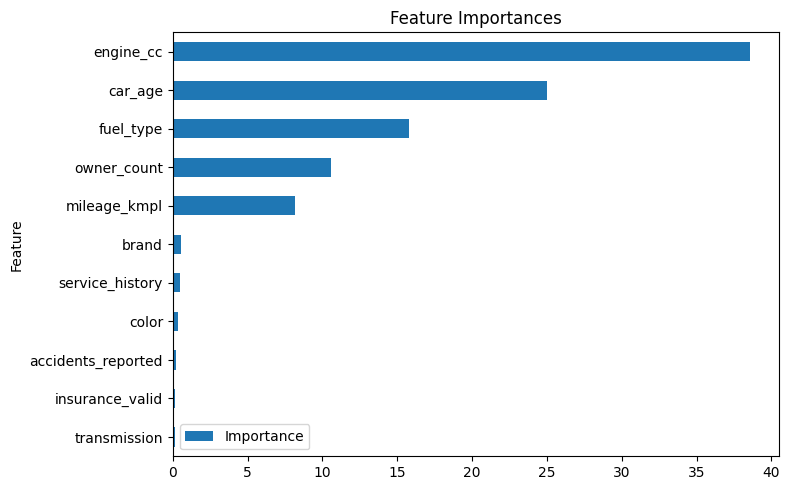

In [50]:
feature_importance(model_cat)

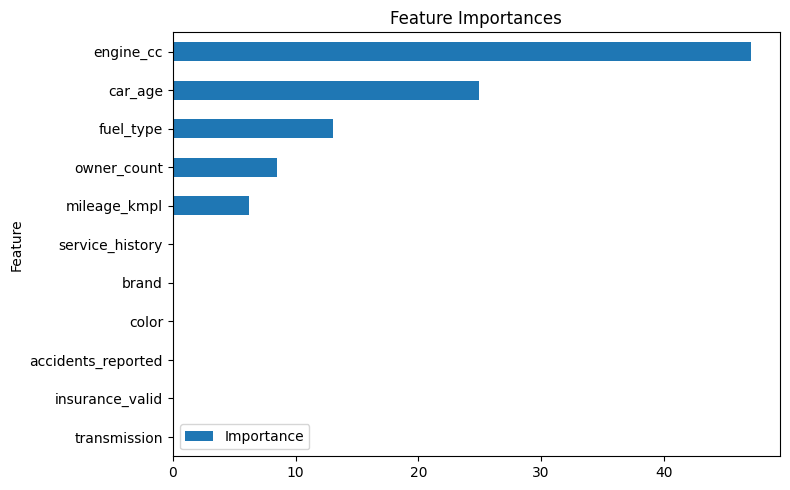

In [51]:
feature_importance(model_cat_tune)

### Model Saving

In [52]:
import joblib

joblib.dump(model_cat_tune, 'catboost_model.pkl')

['catboost_model.pkl']

In [ ]:
# Load models when needed

# catboost_model = joblib.load('catboost_model.pkl')